In [ ]:
pip install pandas openpyxl networkx matplotlib python-louvain dash dash-cytoscape pandas networkx community

In [ ]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from itertools import combinations
from collections import Counter
import community as community_louvain
import community.community_louvain as community_louvain

In [ ]:
# Load the spreadsheet
file_path = "scopus.csv"
keyword_column = "Index Keywords"

In [ ]:
# Read the CSV file
data = pd.read_csv(file_path)

In [ ]:
# Extract keywords
#keywords in the column are separated by ;
data[keyword_column] = data[keyword_column].fillna("")  # Fill NaN with empty strings
data['keywords'] = data[keyword_column].apply(lambda x: [k.strip() for k in x.split(";") if k.strip()])

In [ ]:
data['keywords']

,keywords
0,"[article, earthquake, Japan, machine learning,..."
1,"[Learning algorithms, Machine learning, Buildi..."
2,"[Earthquakes, Hazards, Offshore oil well produ..."
3,"[Buildings, Drag, Floods, Mesh generation, Top..."
4,"[damage, future prospect, numerical model, pal..."
5,"[Decision trees, Flow velocity, Predictive ana..."
6,"[Automation, Large dataset, Ablation experimen..."
7,"[Computation theory, Fault slips, Hazards, Poi..."
8,"[building, collapse, hydrodynamic force, loadi..."
9,"[Buildings, Classification (of information), D..."


In [ ]:
# Count keyword occurrences
all_keywords = [keyword for sublist in data['keywords'] for keyword in sublist]
keyword_counts = Counter(all_keywords)

In [211]:
keyword_counts.most_common()

[('Tsunamis', 12),
 ('Japan', 9),
 ('Earthquakes', 9),
 ('Buildings', 6),
 ('Building damage', 5),
 ('Honshu', 5),
 ('Tohoku', 5),
 ('Hazards', 5),
 ('2011 tohoku earthquakes', 5),
 ('Great east japan earthquakes', 4),
 ('Damage detection', 4),
 ('Synthetic aperture radar', 4),
 ('algorithm', 3),
 ('tsunami', 3),
 ('Tohoku earthquake 2011', 3),
 ('tsunami event', 3),
 ('Miyagi', 3),
 ('Disasters', 3),
 ('Change detection', 3),
 ('Radar imaging', 3),
 ('Artificial intelligence', 3),
 ('Learning systems', 3),
 ('Satellites', 3),
 ('TerraSAR-X', 3),
 ('machine learning', 2),
 ('Learning algorithms', 2),
 ('Tsunami damages', 2),
 ('damage', 2),
 ('Coastal communities', 2),
 ('seismic hazard', 2),
 ('Decision trees', 2),
 ('Trees (mathematics)', 2),
 ('Satellite imagery', 2),
 ('Stochastic models', 2),
 ('Stochastic systems', 2),
 ('Uncertainty analysis', 2),
 ('ground motion', 2),
 ('building', 2),
 ('Ishinomaki', 2),
 ('Image classification', 2),
 ('Pixels', 2),
 ('Support vector machines

In [ ]:
# Create an empty graph
G = nx.Graph()

In [ ]:
# Add edges to the graph based on co-occurrence of keywords
for keyword_list in data['keywords']:
    for pair in combinations(keyword_list, 2):
        if G.has_edge(*pair):
            G[pair[0]][pair[1]]['weight'] += 1
        else:
            G.add_edge(*pair, weight=1)

In [ ]:
# Detect communities using Louvain method
partition = community_louvain.best_partition(G)

In [ ]:
# Assign community colors
community_colors = {node: f"C{color}" for node, color in partition.items()}


In [ ]:
# Assign node sizes based on keyword frequency
node_sizes = [keyword_counts[node] * 100 for node in G.nodes]


In [ ]:
pos = nx.spring_layout(G, seed=42)

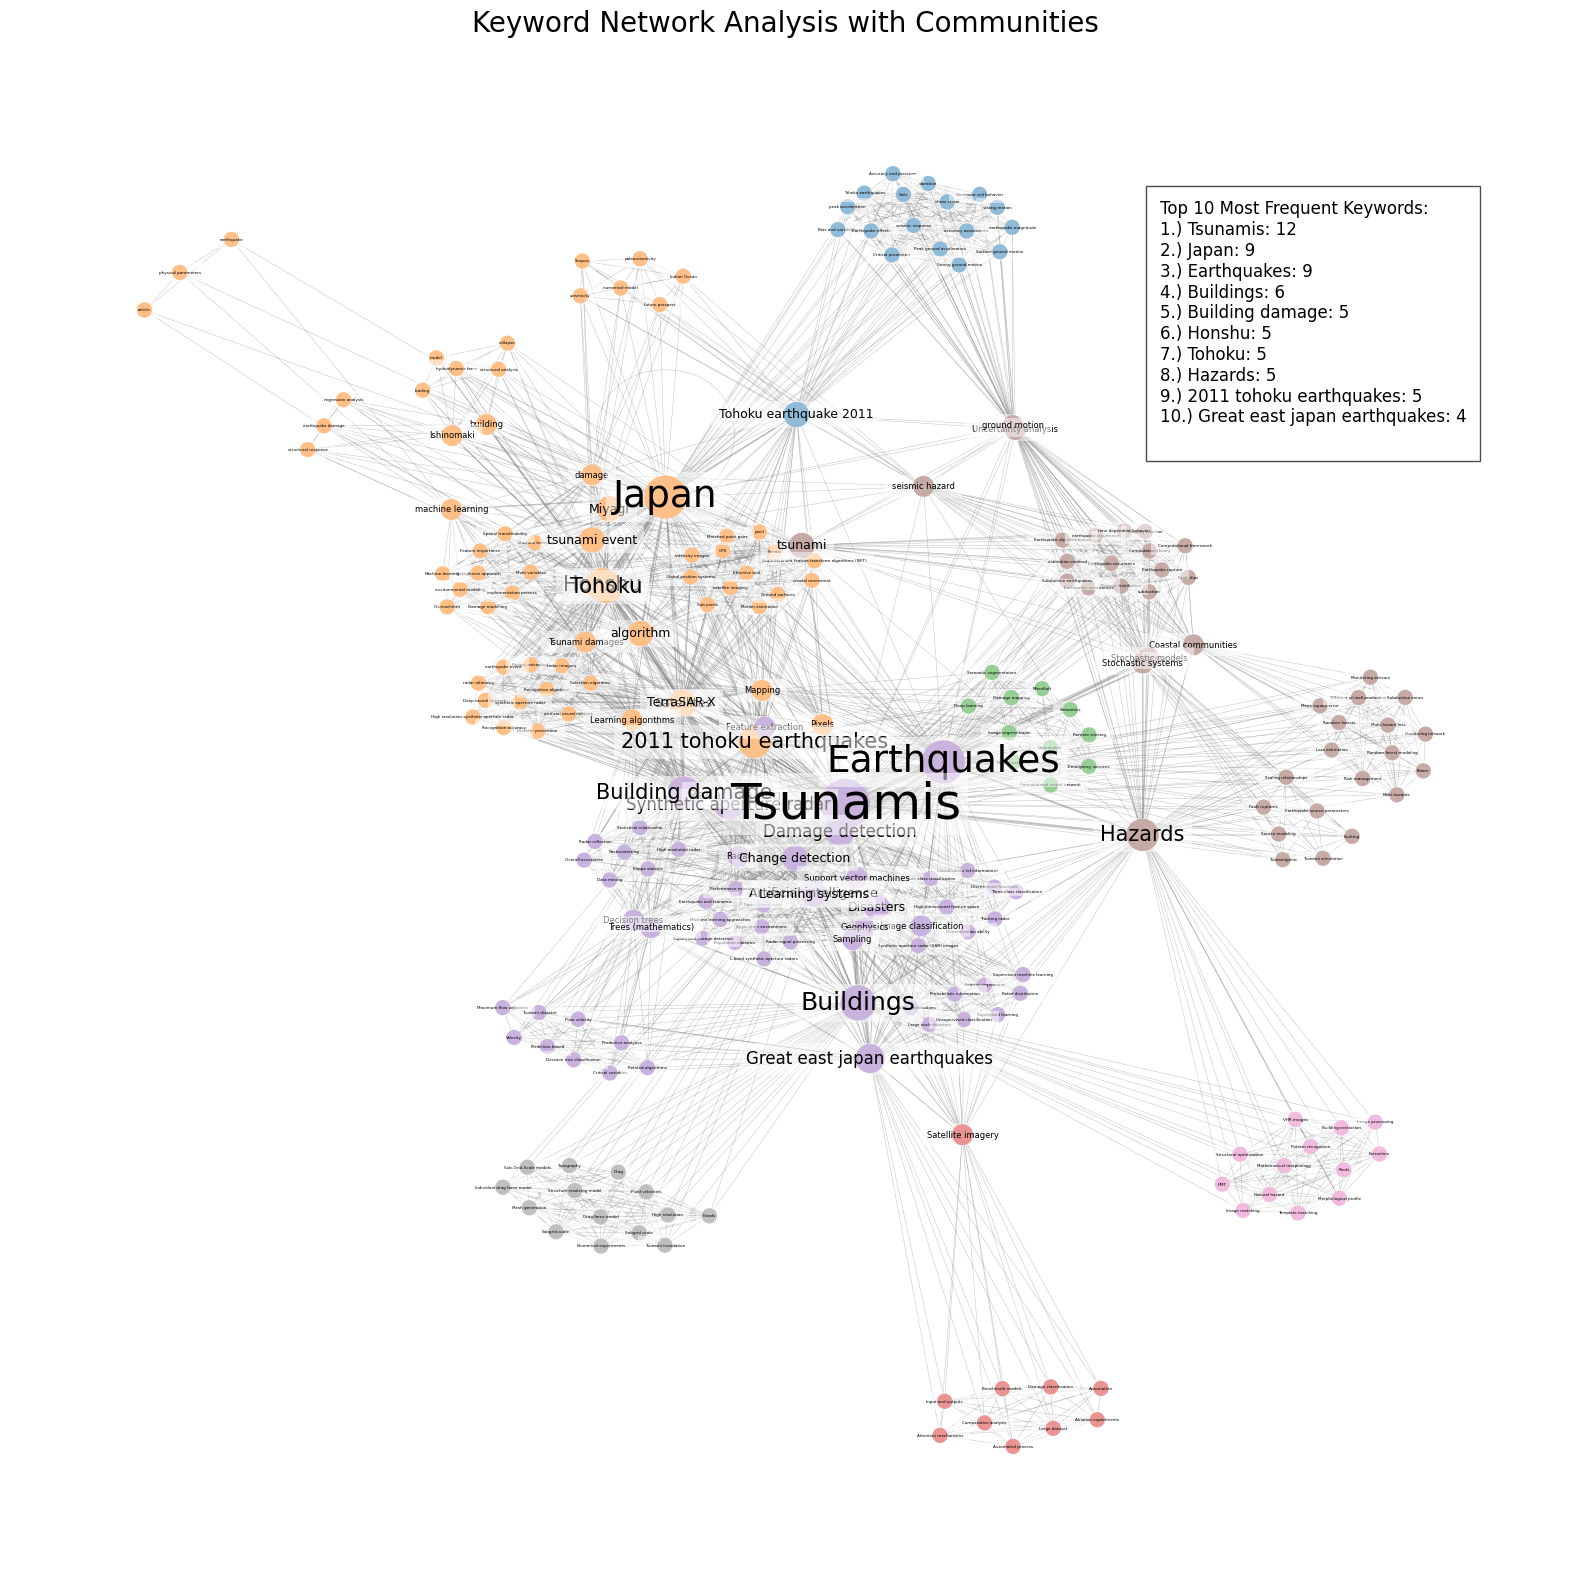

In [222]:
# Set the figure size
plt.figure(figsize=(20, 20))  # Adjust the figure size (width, height) as needed

# Draw nodes with colors based on community
nx.draw_networkx_nodes(
    G, pos, node_size=node_sizes, node_color=[community_colors[node] for node in G.nodes]
)

# Draw edges with weight-based transparency
edges = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edges(
    G, pos, edgelist=edges.keys(), alpha=0.5, edge_color="grey", width=[w / 3 for w in edges.values()]
)

# Sort the nodes by keyword_counts in descending order to simulate z-index
sorted_nodes = sorted(pos.items(), key=lambda item: keyword_counts[item[0]], reverse=False)

for node, (x, y) in sorted_nodes:
    font_size = 3 * keyword_counts[node]
    plt.text(x, y, s=node, fontsize=font_size, ha='center', va='center', color='black',
             bbox={'facecolor': 'white', 'alpha': 0.5, 'pad': 5, 'edgecolor': 'none'})


top_10_keywords = keyword_counts.most_common(10)
table_str = "Top 10 Most Frequent Keywords:\n"
i = 1
for keyword, count in top_10_keywords:
    table_str += f"{i}.) {keyword}: {count}\n"
    i+=1

plt.figtext(0.7, 0.8, table_str, fontsize=12, ha="left", va="top", bbox={"facecolor": "white", "alpha": 0.7, "pad": 10})

# Add title and remove axes
plt.title("Keyword Network Analysis with Communities", fontsize=20)  # Larger title
plt.axis("off")

# Display the plot
plt.show()
